In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

train = pd.read_csv(r"D:\UTDALLAS\Semester2\Pred_TK\Project\rossmann-store-sales\train.csv", low_memory=False)
store = pd.read_csv(r"D:\UTDALLAS\Semester2\Pred_TK\Project\rossmann-store-sales\store.csv", low_memory=False)

#train = pd.read_csv("train.csv")
#store = pd.read_csv("store.csv")

# Merge store info into train
df = pd.merge(train, store, on='Store')


In [5]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [7]:
# Understanding the structure of the data
df.shape

(1017209, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [9]:
df.describe(include='all')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,509178
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,293122
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,NaN
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,NaN
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,NaN


In [10]:
# Check for missing values

df.isnull().sum().sort_values(ascending=False)


PromoInterval                508031
Promo2SinceYear              508031
Promo2SinceWeek              508031
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
CompetitionDistance            2642
DayOfWeek                         0
Promo2                            0
Assortment                        0
Store                             0
SchoolHoliday                     0
StateHoliday                      0
Promo                             0
Open                              0
Customers                         0
Sales                             0
Date                              0
StoreType                         0
dtype: int64

In [11]:
# Here maybe the competition opening date is unknown. Maybe no competition existed yet, or the data wasn't recorded.
df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df['CompetitionOpenSinceYear'].fillna(0, inplace=True)

In [12]:
# If Promo2 is 0, then these columns are NA by design, so will fill accordingly
df['Promo2SinceWeek'].fillna(0, inplace=True)
df['Promo2SinceYear'].fillna(0, inplace=True)
df['PromoInterval'].fillna('None', inplace=True)


In [13]:
# Replace with a large number (means "no competition nearby")
df['CompetitionDistance'].fillna(df['CompetitionDistance'].max(), inplace=True)



In [14]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None


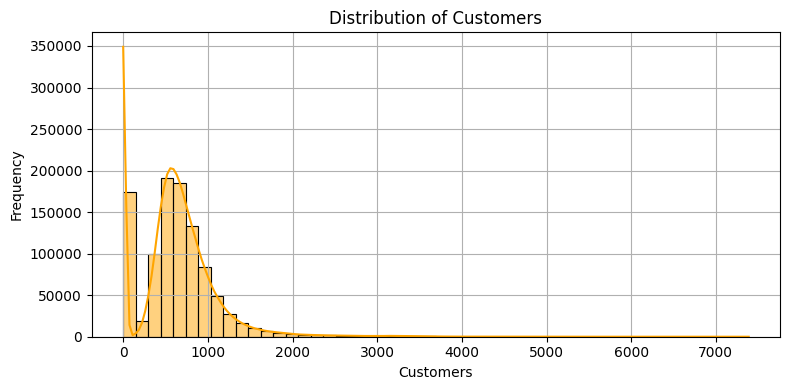

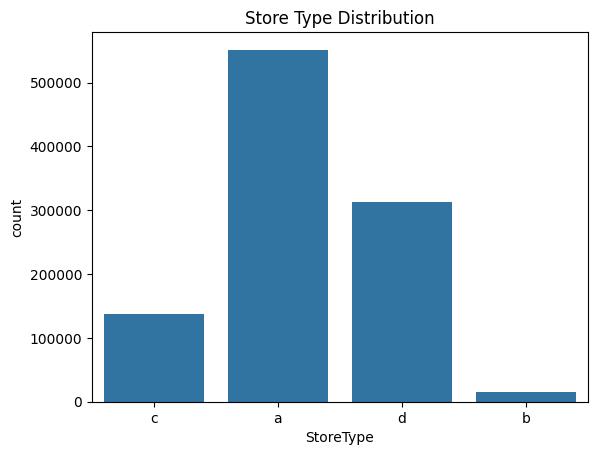

In [15]:
# Univariate Analysis

# Numerical
plt.figure(figsize=(8, 4))
sns.histplot(df['Customers'], bins=50, kde=True, color='orange')
plt.title('Distribution of Customers')
plt.xlabel('Customers')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# X-axis (Customers), shows the value range (e.g., number of customers like 0, 500, 1000, etc.)

# Y-axis (Frequency), shows how many rows (store-day entries) had that number of customers


# Categorical
sns.countplot(x='StoreType', data=df)
plt.title('Store Type Distribution')
plt.show()


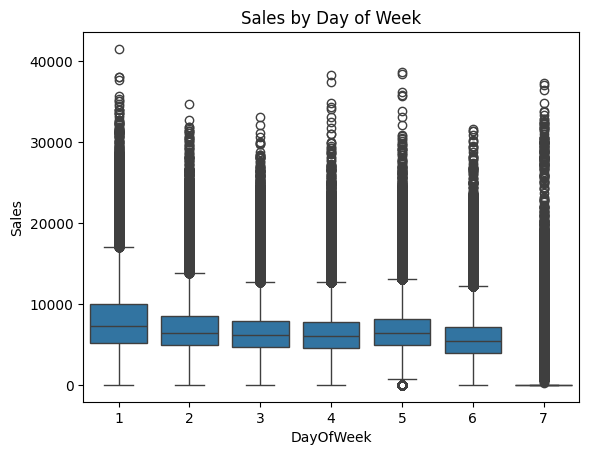

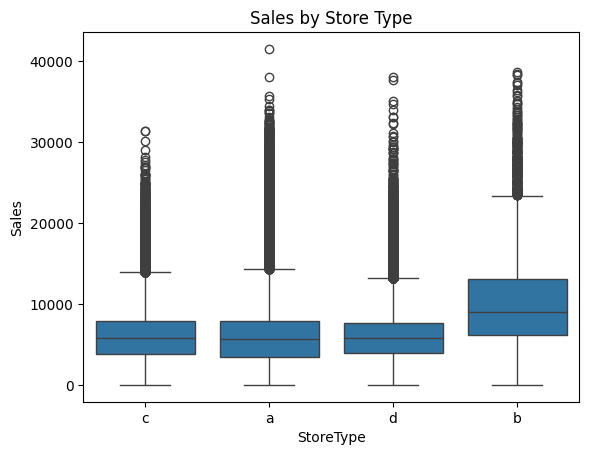

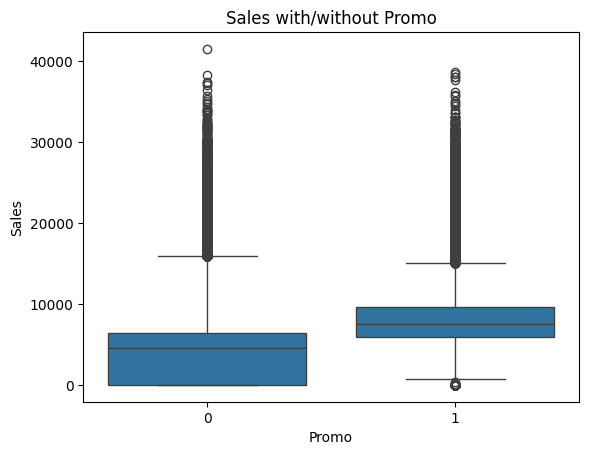

In [16]:
# Bivariate Analysis
# Sales vs DayOfWeek
sns.boxplot(x='DayOfWeek', y='Sales', data=df)
plt.title('Sales by Day of Week')
plt.show()

# Sales vs StoreType
sns.boxplot(x='StoreType', y='Sales', data=df)
plt.title('Sales by Store Type')
plt.show()

# Sales vs Promo
sns.boxplot(x='Promo', y='Sales', data=df)
plt.title('Sales with/without Promo')
plt.show()


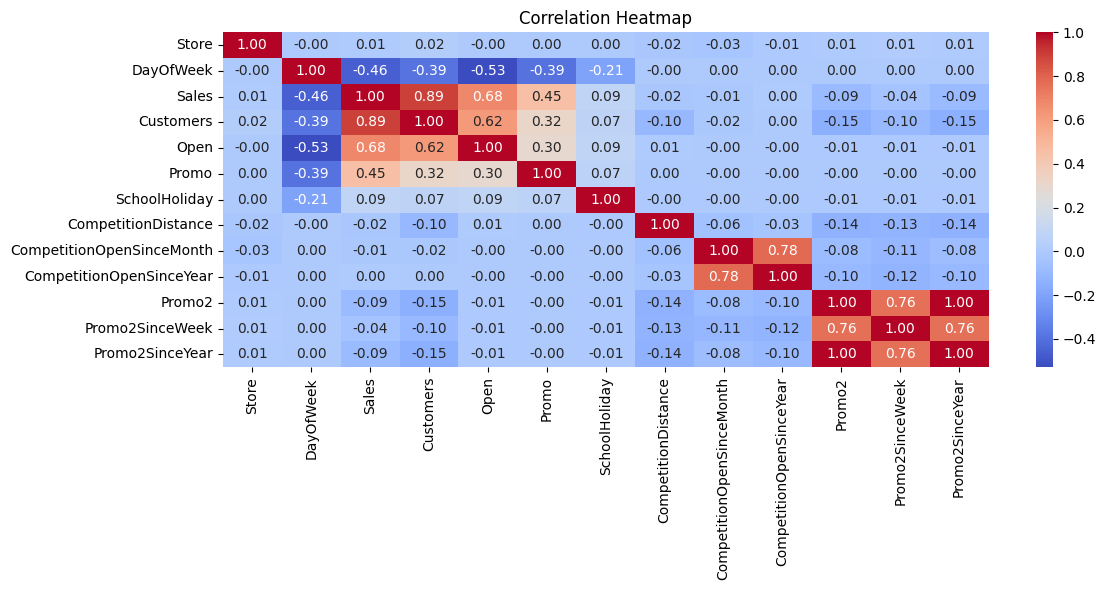

In [17]:
# Correlation Analysis

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

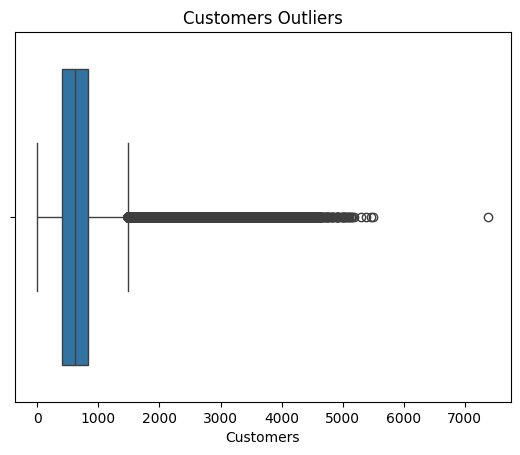

In [18]:
# Outlier Detection
# Customers
sns.boxplot(x=df['Customers'])
plt.title('Customers Outliers')
plt.show()


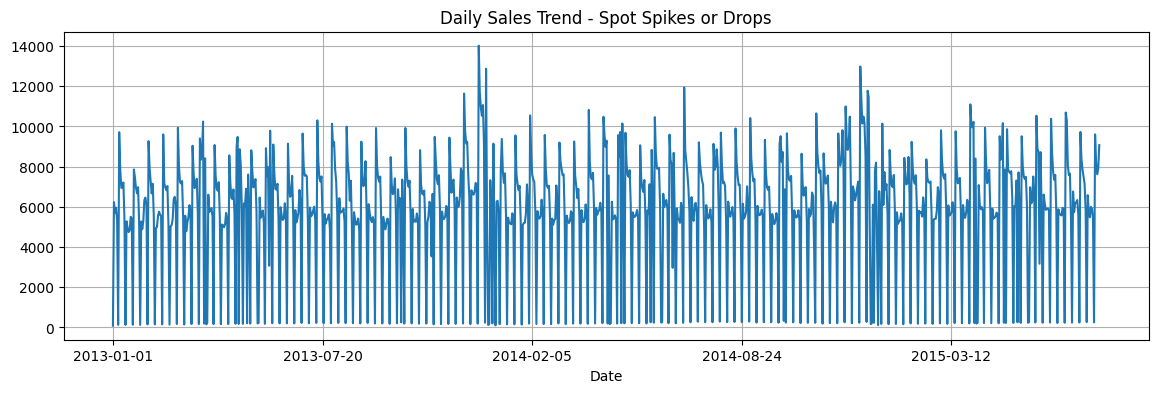

In [19]:
# Daily/weekly anomalies in sales

df.groupby('Date')['Sales'].mean().plot(figsize=(14, 4))
plt.title('Daily Sales Trend - Spot Spikes or Drops')
plt.grid()
plt.show()


Top 10 Stores by Average Sales:
 Store
262     20718.515924
817     18108.139066
562     17969.556263
1114    17200.196391
251     15814.087049
842     15242.114776
513     15129.942675
788     14949.194268
733     14933.288747
383     14320.466030
Name: Sales, dtype: float64
Bottom 10 Stores by Average Sales:
 Store
307    2244.503185
543    2313.468153
198    2407.933121
208    2443.791932
841    2461.395966
254    2485.839703
972    2550.559448
794    2553.475584
219    2591.467091
210    2641.309979
Name: Sales, dtype: float64


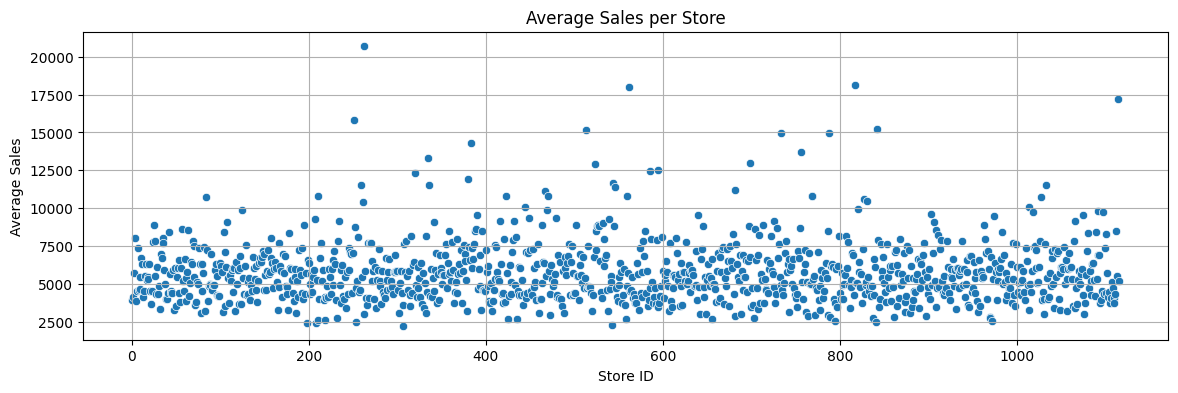

In [21]:
# Inspect which stores are spiking high or dipping low.


store_sales = df.groupby('Store')['Sales'].mean()

# Sort to find highest and lowest average sales
store_sales.sort_values(ascending=False).head(10)  # Top 10
store_sales.sort_values().head(10)  # Bottom 10

print("Top 10 Stores by Average Sales:\n", store_sales.sort_values(ascending=False).head(10))
print("Bottom 10 Stores by Average Sales:\n", store_sales.sort_values().head(10))


plt.figure(figsize=(14, 4))
sns.scatterplot(x=store_sales.index, y=store_sales.values)
plt.xlabel('Store ID')
plt.ylabel('Average Sales')
plt.title('Average Sales per Store')
plt.grid(True)
plt.show()



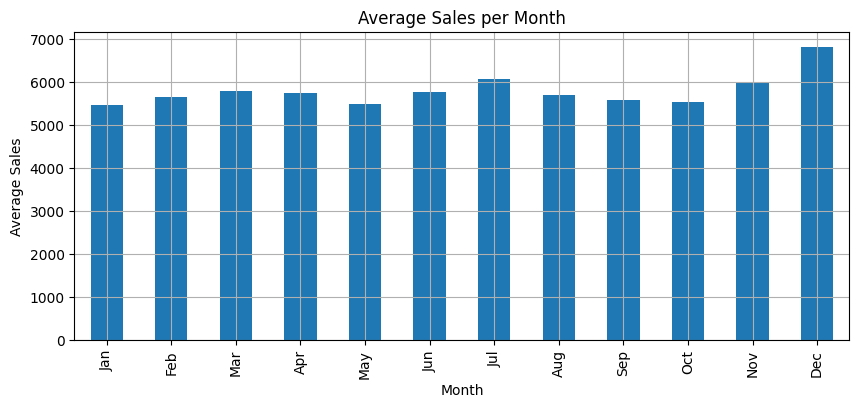

In [25]:
#Analyzing average sales per month
df['Date'] = pd.to_datetime(df['Date'])
df['MonthName'] = df['Date'].dt.strftime('%b')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['MonthName'] = pd.Categorical(df['MonthName'], categories=month_order, ordered=True)
monthly_avg_sales = df.groupby('MonthName')['Sales'].mean()
monthly_avg_sales.plot(kind='bar', figsize=(10, 4))
plt.title('Average Sales per Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()


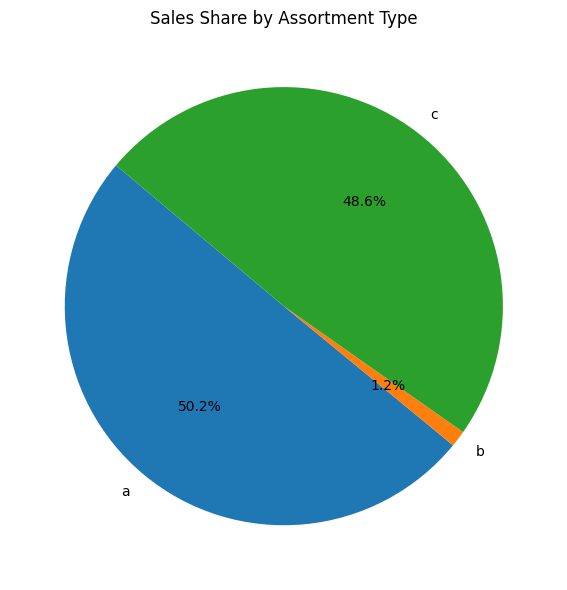

In [36]:
#Sales Share by Assortment Type
assort_sales = df.groupby('Assortment')['Sales'].sum()

plt.figure(figsize=(6, 6))
plt.pie(assort_sales, labels=assort_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Share by Assortment Type')
plt.tight_layout()
plt.show()


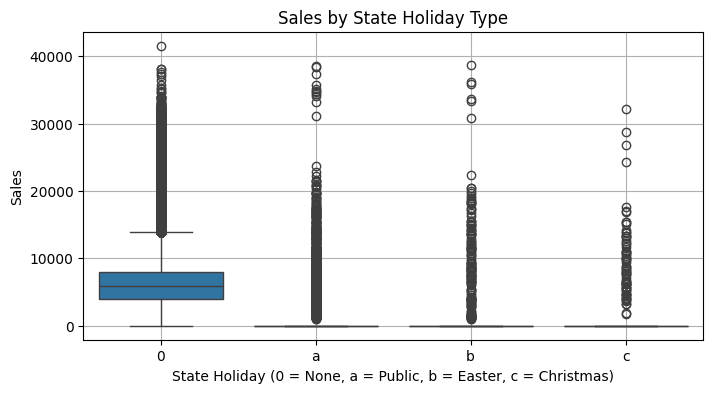

In [26]:
# Compare average sales across different types of holidays
plt.figure(figsize=(8, 4))
sns.boxplot(x='StateHoliday', y='Sales', data=df)
plt.title('Sales by State Holiday Type')
plt.xlabel('State Holiday (0 = None, a = Public, b = Easter, c = Christmas)')
plt.grid(True)
plt.show()


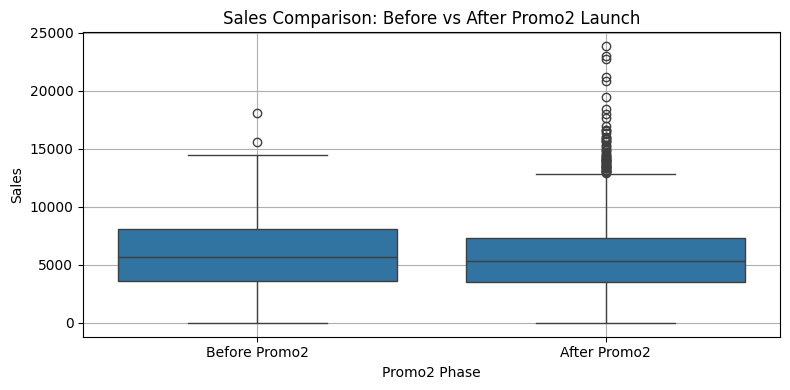

In [31]:
# Step 1: Filter and sample only a few thousand Promo2 records (very light)
sample_df = df[df['Promo2'] == 1][['Date', 'Sales', 'Promo2SinceYear', 'Promo2SinceWeek']].sample(3000)

# Step 2: Convert date column
sample_df['Date'] = pd.to_datetime(sample_df['Date'])

# Step 3: Create Promo2 start date from year + week
sample_df['Promo2Start'] = pd.to_datetime(
    sample_df['Promo2SinceYear'].fillna(0).astype(int).astype(str) + '-' +
    sample_df['Promo2SinceWeek'].fillna(1).astype(int).astype(str) + '-1',
    format='%Y-%W-%w',
    errors='coerce'
)

# Step 4: Label each row based on date comparison
sample_df['Promo2Phase'] = sample_df.apply(
    lambda row: 'Before Promo2' if row['Date'] < row['Promo2Start'] else 'After Promo2',
    axis=1
)

# Step 5: Plot with corrected order
plt.figure(figsize=(8, 4))
sns.boxplot(x='Promo2Phase', y='Sales', data=sample_df, order=['Before Promo2', 'After Promo2'])
plt.title('Sales Comparison: Before vs After Promo2 Launch')
plt.xlabel('Promo2 Phase')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
from scipy.stats import ttest_ind

# T-test between Before and After Promo2 groups
sales_before = sample_df[sample_df['Promo2Phase'] == 'Before Promo2']['Sales']
sales_after = sample_df[sample_df['Promo2Phase'] == 'After Promo2']['Sales']

t_stat, p_val = ttest_ind(sales_before, sales_after, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")


T-statistic: 1.9119
P-value: 0.0564


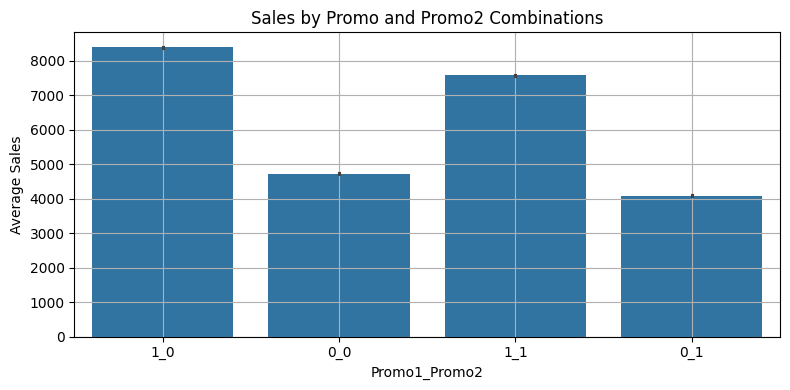

In [35]:
#Synergistic vs. Counterproductive Effects of Combined Promotions

df['PromoCombo'] = df['Promo'].astype(str) + '_' + df['Promo2'].astype(str)

plt.figure(figsize=(8, 4))
sns.barplot(x='PromoCombo', y='Sales', data=df)
plt.title('Sales by Promo and Promo2 Combinations')
plt.xlabel('Promo1_Promo2')
plt.ylabel('Average Sales')
plt.grid(True)
plt.tight_layout()
plt.show()
